In [78]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

from sklearn.preprocessing import LabelEncoder

In [79]:
df = pd.read_csv('dataset2.csv')

In [62]:
le = LabelEncoder()
df1['LaunchSite'] = le.fit_transform(df1['LaunchSite'])
df1

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,6123.547647,LEO,0,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,525.000000,LEO,0,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,677.000000,ISS,0,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,500.000000,PO,2,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,3170.000000,GTO,0,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,15600.000000,VLEO,1,2,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,12,B1060,-80.603956,28.608058,1
86,87,15600.000000,VLEO,1,3,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,13,B1058,-80.603956,28.608058,1
87,88,15600.000000,VLEO,1,6,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,12,B1051,-80.603956,28.608058,1
88,89,15600.000000,VLEO,0,3,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,12,B1060,-80.577366,28.561857,1


In [63]:
df1['Orbit'] = le.fit_transform(df1['Orbit'])

In [71]:
df1['Serial'] = le.fit_transform(df1['Serial'])

In [72]:
X = df1.drop('Class', axis=1)
y = df1['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
df1 = df.drop(['Date', 'BoosterVersion', 'Outcome'], axis=1)

In [92]:
RF = RandomForestClassifier()
RF.fit(X_train, y_train)

RandomForestClassifier()

In [95]:
y_pred = RF.predict(X_test)
accuracy_RF = accuracy_score(y_test, y_pred)
print("Accuracy of the model is:", accuracy_RF)
print(classification_report(y_test, y_pred))

Accuracy of the model is: 0.8888888888888888
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         4
           1       1.00      0.86      0.92        14

   micro avg       0.89      0.89      0.89        18
   macro avg       0.83      0.93      0.86        18
weighted avg       0.93      0.89      0.90        18
 samples avg       0.89      0.89      0.89        18



In [80]:
y = to_categorical(df1['Class'])
X = df1.drop('Class', axis=1)

In [81]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [88]:
MLP = Sequential()
MLP.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
MLP.add(Dense(32, activation='relu'))
MLP.add(Dense(2, activation='softmax'))

c:\Users\Lenovo\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [89]:
MLP.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [90]:
MLP.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 240ms/step - accuracy: 0.3741 - loss: 0.8771 - val_accuracy: 0.1667 - val_loss: 0.8900
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4410 - loss: 0.7373 - val_accuracy: 0.2222 - val_loss: 0.7935
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5543 - loss: 0.6685 - val_accuracy: 0.3333 - val_loss: 0.7107
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6536 - loss: 0.6158 - val_accuracy: 0.5556 - val_loss: 0.6421
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7561 - loss: 0.5728 - val_accuracy: 0.7222 - val_loss: 0.5862
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8503 - loss: 0.5293 - val_accuracy: 0.7778 - val_loss: 0.5394
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8307 - loss: 0.5090 - val_accuracy: 0.7778 - val_loss: 0.4986
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8455 - loss: 0.4803 - val_accuracy: 0.8333 - val_loss: 0.4636

In [96]:
loss, accuracy_MLP = MLP.evaluate(X_test, y_test)
print('Accuracy of the model is:', accuracy_MLP)
print('Loss of the model is:', loss)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.8333 - loss: 0.2504
Accuracy of the model is: 0.8333333134651184
Loss of the model is: 0.2503552734851837


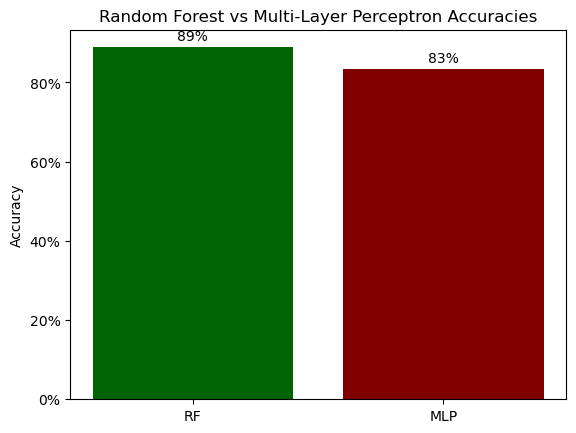

In [117]:
models = ['RF', 'MLP']
accuracies = [accuracy_RF, accuracy_MLP]
plt.bar(models, accuracies, color = ['darkgreen','maroon'])
plt.ylabel('Accuracy')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f"{y:.0%}"))
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f"{acc:.0%}", ha='center', va='bottom')
plt.title('Random Forest vs Multi-Layer Perceptron Accuracies')
plt.show()